In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from scipy.stats import kruskal
from scipy.stats import gaussian_kde

import sys
import os

sys.path.append(os.path.relpath("../../huygens"))
sys.path.append(os.path.relpath("../../galileo"))

import galileo as gal
import huygens as huy

plt.rcParams['ps.useafm'] = True
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42


# Transcripts to genes

In [2]:
t2g = pd.read_csv("../data/intermediate/sleuth_diff/ensembl_t2g.csv")
t2g["format_gene_id"] = t2g["hgnc_gene"].fillna("") + "_" + t2g["ens_gene"]

format_gene_map = dict(zip(t2g["ens_gene"],t2g["format_gene_id"]))

# Manifest

In [3]:
gtex_manifest_1 = pd.read_csv("../../data/raw/gtex/E-MTAB-5214.sdrf.txt", sep="\t")
gtex_manifest_2 = pd.read_csv("../../data/raw/gtex/E-MTAB-2919.sdrf.txt", sep="\t")

gtex_manifest = pd.concat([
    gtex_manifest_1,
    gtex_manifest_2
], 
    axis=0, sort=True)

gtex_manifest = gtex_manifest.drop_duplicates(subset=["Source Name"])
gtex_manifest = gtex_manifest.dropna(subset=["Comment[histological type]"],axis=0)
gtex_manifest = gtex_manifest.set_index("Source Name")
gtex_manifest["tissue"] = gtex_manifest["Comment[histological type]"]

In [4]:
def format_transformed(body_site):
    if body_site == 'Cells - EBV-transformed lymphocytes':
        return "EBV-transformed lymphocytes"
    elif body_site == "Cells - Transformed fibroblasts":
        return "Transformed fibroblasts"
    else:
        return "Non-transformed samples"
    
gtex_manifest["transform"] = gtex_manifest["Comment[original body site annotation]"].apply(format_transformed)    

# Preprocess GTEx

In [5]:
gtex_genex = pd.read_hdf("../../data/processed/gtex/gtex_genex.hdf",key="gtex_genex")
gtex_a3ss = pd.read_hdf("../../data/processed/gtex/gtex_a3ss.hdf",key="gtex_a3ss")
gtex_se = pd.read_hdf("../../data/processed/gtex/gtex_se.hdf",key="gtex_se")

In [6]:
gtex_a3ss.columns = [format_gene_map.get(x.split(".")[0],"unnamed")+"_"+x for x in gtex_a3ss.columns]
gtex_se.columns = [format_gene_map.get(x.split(".")[0],"unnamed")+"_"+x for x in gtex_se.columns]

# Splicing and expression

In [7]:
mdm4_6 = gtex_se["MDM4_ENSG00000198625_ENSG00000198625.8_ES_1_204501318:204501374:204506557:204506625:204507336:204507436_204506557:204506625"]
rpl22l1_3a = gtex_a3ss["RPL22L1_ENSG00000163584_ENSG00000163584.13_A3_3_170586086:170586168:170585801:170585923:170585801:170585990_170585923:170585990"]

mdm4 = gtex_genex["MDM4_ENSG00000198625.12"]
rpl22l1 = gtex_genex["RPL22L1_ENSG00000163584.17"]
rpl22 = gtex_genex["RPL22_ENSG00000116251.9"]

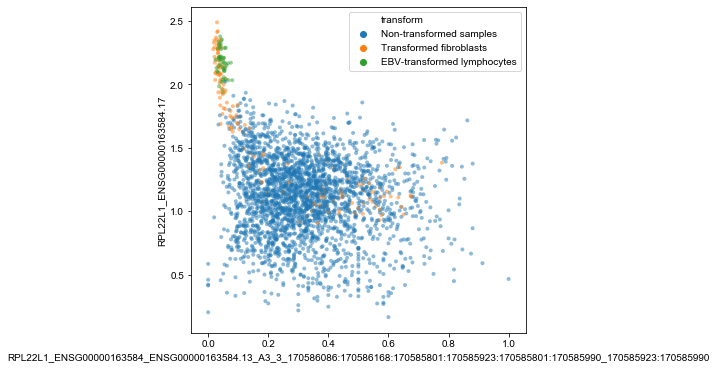

In [8]:
plt.figure(figsize=(6,6))
sns.scatterplot(1-rpl22l1_3a,
                rpl22l1,
                hue=gtex_manifest["transform"],
                linewidth=0,
                s=16,
                alpha=0.5
               )

In [9]:
fibroblasts = gtex_manifest["transform"]=="Transformed fibroblasts"
fibroblasts = set(fibroblasts[fibroblasts].index)

fibroblast_rpl22l1_3a = rpl22l1_3a[rpl22l1_3a.index.map(lambda x: x in fibroblasts)]

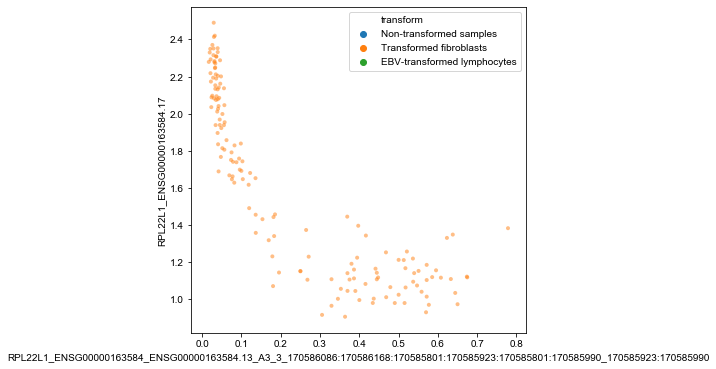

In [10]:
plt.figure(figsize=(6,6))
sns.scatterplot(1-fibroblast_rpl22l1_3a,
                rpl22l1,
                hue=gtex_manifest["transform"],
                linewidth=0,
                s=16,
                alpha=0.5
               )

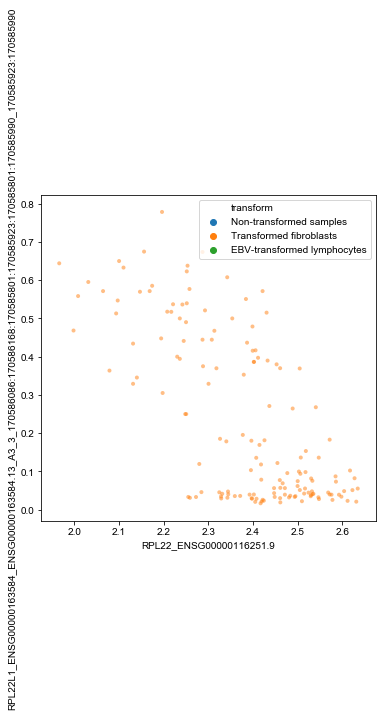

In [16]:
plt.figure(figsize=(6,6))
sns.scatterplot(rpl22,
                1-fibroblast_rpl22l1_3a,
                hue=gtex_manifest["transform"],
                linewidth=0,
                s=16,
                alpha=0.5
               )

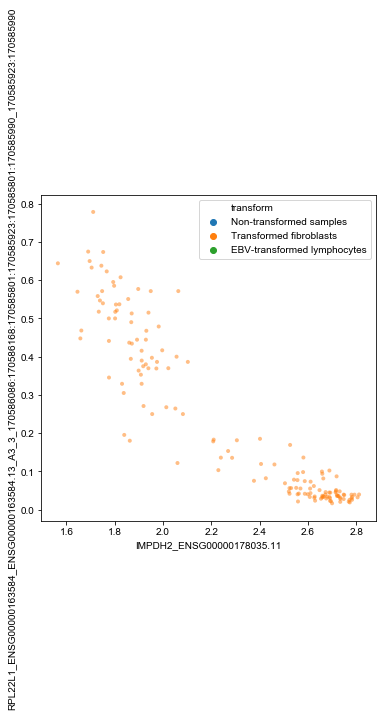

In [19]:
plt.figure(figsize=(6,6))
sns.scatterplot(gtex_genex["IMPDH2_ENSG00000178035.11"],
                1-fibroblast_rpl22l1_3a,
                hue=gtex_manifest["transform"],
                linewidth=0,
                s=16,
                alpha=0.5
               )

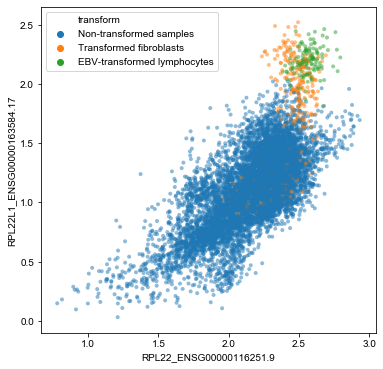

In [49]:
plt.figure(figsize=(6,6))
sns.scatterplot(rpl22,
                rpl22l1,
                hue=gtex_manifest["transform"],
                linewidth=0,
                s=16,
                alpha=0.5
               )